# CP213: Tutorial Notebook S2 Week 3

## Question 1

Given the function $f(x,y,z)=x+2y-2z$, subject to the constraint, $x^2 +2y^2 +4z^2=1$, determine the associated maxima/minima.


## Model solution for Q1

Maxima/minima must satisfy $\nabla f(x,y,z)=\lambda \nabla g(x,y,z)$.

The gradient of the objective function $f(x,y,z)=x+2y-2z$ is given by
\begin{align*}
    \nabla f &=\dfrac{\partial f}{\partial x}\hat{\imath}+\dfrac{\partial f}{\partial y}\hat{\jmath}+\dfrac{\partial f}{\partial z}\hat{k}\\
    \nabla f &= \hat{\imath} + 2\hat{\jmath} -2\hat{k}
\end{align*}
The gradient of the constraint function $g(x,y,z)= x^2 +2y^2 +4z^2 -1$ is given by
\begin{align*}
    \nabla g &=\dfrac{\partial g}{\partial x}\hat{\imath}+\dfrac{\partial g}{\partial y}\hat{\jmath}+\dfrac{\partial g}{\partial z}\hat{k}
    \\
    \nabla g &= 2x\hat{\imath} + 4y\hat{\jmath} +8z\hat{k}
    .
\end{align*}
We obtain the following set of equations to be solved:
\begin{align*}
    1 &= 2 \lambda x \\
    2 &= 4 \lambda y \\
    -2 &= 8 \lambda z \\
    x^2 +2y^2 +4z^2 &= 1
\end{align*}
Rearranging each of the first three for $x$, $y$ and $z$, respectively, gives:
\begin{align*}
    \frac{1}{2\lambda} &= x \\
    \frac{1}{2\lambda} &= y \\
    -\frac{1}{4\lambda} &= z \\
\end{align*}
Substituting these expressions into our constraint gives:
\begin{align*}
    \left(\frac{1}{2\lambda}\right)^2 + 2\left( \frac{1}{2\lambda}\right)^2 + 4\left( \frac{1}{4\lambda}\right)^2&=1
\end{align*}
Rearranging, we find $\lambda =\pm 1$.

From the system of equations, when $\lambda = 1$: $x=1/2$, $y=1/2$, $z=-1/4$, and When $\lambda = -1$: $x=-1/2$, $y=-1/2$, $z=1/4$.

The values of the objective function that correspond to these respective points are:
\begin{align*}
    f(1/2,1/2,-1/4)&=2
    \\
    f(-1/2,-1/2,1/4)&=-2
\end{align*}
Hence, the maximum occurs at $(1/2,1/2,-1/4,2)$, and the minimum occurs at $(-1/2,-1/2,1/4,-2)$.


We can use Python to solve this problem with the `minimize` function from the `scipy.optimize` module.  Documentation and examples for its use can be found in the [SciPy manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

The function `minimize` takes an objective function as an argument, as well as an initial point to start the search for the minimum.  Constraints can be added to the problem, through a list passed to an additional (optional) `constraints` argument to the function.

`minimize` expects that the first argument of the objective function is a list, which contains the values of the variables to be optimized, which in this problem is $x$, $y$, and $z$.  In function `f` in the code below, this argument is given by the variable `var`, and the initial line of code within the function is to unpack the list into the variables `x`, `y`, and `z`.  The same applies to the constraint function `g`.

Note that this code finds the minimum of the function $f$, subject to the contraint $g=0$.  In order to find a maximum, just redefine the function $f$ as $-f$.

In [7]:
from scipy.optimize import minimize

def f(var):
    x, y, z = var
    return x + 2*y - 2*z
    
def g(var):
    x, y, z = var
    return x**2 + 2*y**2 + 4*z**2 - 1
    
constraint_list = [{'type': 'eq', 'fun':g}]

guess = [1, 0, 0]
opt = minimize(f, guess, constraints=constraint_list)

print(opt)

     fun: -2.000000023339615
     jac: array([ 1.,  2., -2.])
 message: 'Optimization terminated successfully'
    nfev: 53
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([-0.49999998, -0.50000003,  0.24999999])


## Question 2

By using the programmer's best friend, namely searching online, find relevant python code and adapt this to present:
1. A 3d plot of the 'irn-bru hill' function presented in class, given by $f(x,y)=x^2-y^2$
2. A contour of the above function, and add to this diagram the constraint $g(x,y)=x^2+y^2=4$

## Model solution for Q2

Interactive

[mplot3d examples](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

The initial line "`%matplotlib notebook`" in the code block allows the graph to be interactive.  For example, you can left click and drag your mouse over the figure in order to rotate it to view it from a different perspective.  

<IPython.core.display.Javascript object>


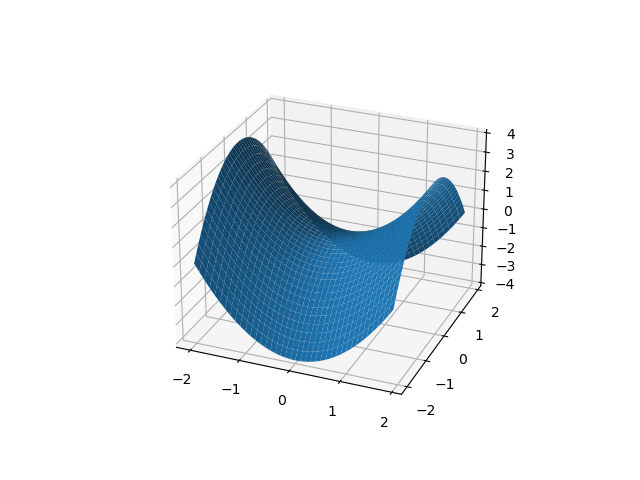

In [1]:
%matplotlib notebook

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



def f(var):
    x, y = var
    return x**2 - y**2


x_dat = np.arange(-2.0, 2.0, 0.1)
y_dat = np.arange(-2.0, 2.0, 0.1)
x_mesh, y_mesh = np.meshgrid(x_dat, y_dat)

nrow, ncol = x_mesh.shape

z_mesh = np.zeros(x_mesh.shape)
for row in range(nrow):
    for col in range(ncol):
        x = x_mesh[row, col]
        y = y_mesh[row, col]
        z_mesh[row, col] = f([x,y])

        
fig = plt.figure()
ax = fig.gca(projection='3d')        
ax.plot_surface(x_mesh, y_mesh, z_mesh)
plt.show()


We can also try to use a contour plot.  For some examples, see the links:
- [Matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_label_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-label-demo-py)
- [StackOverflow](https://stackoverflow.com/questions/17431441/matplotlib-scatter-plot-to-foreground-on-top-of-a-contour-plot)

<IPython.core.display.Javascript object>


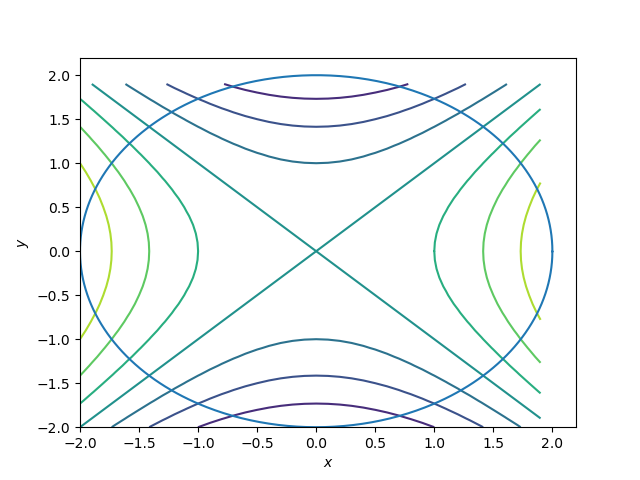

In [49]:
%matplotlib notebook

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



def f(var):
    x, y = var
    return x**2 - y**2

x_dat = np.arange(-2.0, 2.0, 0.1)
y_dat = np.arange(-2.0, 2.0, 0.1)
x_mesh, y_mesh = np.meshgrid(x_dat, y_dat)

nrow, ncol = x_mesh.shape

z_mesh = np.zeros(x_mesh.shape)
for row in range(nrow):
    for col in range(ncol):
        x = x_mesh[row, col]
        y = y_mesh[row, col]
        z_mesh[row, col] = f([x,y])

        
        
fig, ax = plt.subplots()

ax.contour(x_mesh, y_mesh, z_mesh)

phi_dat = np.arange(0.0, 2.0*np.pi, 0.01)
x_dat = [2*np.cos(phi) for phi in phi_dat]
y_dat = [2*np.sin(phi) for phi in phi_dat]
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.plot(x_dat, y_dat)

plt.show()

Finally, we can use `minimize` in order to try and find the minimum of the function, subject to the constraint.

In [43]:
from scipy.optimize import minimize

def f(var):
    x, y = var
    return x**2 - y**2
    
def g(var):
    x, y = var
    return x**2 + y**2 - 4
    
constraint_list = [{'type': 'eq', 'fun':g}]

guess = [1, 0]
opt = minimize(f, guess, constraints=constraint_list)

print(opt)

     fun: -4.000000000022581
     jac: array([ 5.96046448e-08, -4.00000000e+00])
 message: 'Optimization terminated successfully'
    nfev: 175
     nit: 47
    njev: 46
  status: 0
 success: True
       x: array([1.50240357e-08, 2.00000000e+00])


## Question 3

Find all points on the surface $xy−z^2+1=0$ that are closest to the origin. 

Answer: $(0,0,1)$ and $(0,0,−1)$

## Model solution for Q3

Function to be minimized is the distance from the origin to the value of $x$, $y$, and $z$.
\begin{align*}
    D(x,y,z) &= \sqrt{x^2+y^2+z^2}
\end{align*}
Minima will satisfy $\nabla D(x,y,z)=\lambda \nabla h(x,y,z)$,
where $h(x,y,z)=xy-z^2+1$
\begin{align*}
    \nabla D(x,y,z) &= \frac{x}{\sqrt{x^2+y^2+z^2}}\hat{\imath} + \frac{y}{\sqrt{x^2+y^2+z^2}}\hat{\jmath} + \frac{z}{\sqrt{x^2+y^2+z^2}}\hat{k}
\end{align*}
The gradient of the constraint function $h$ is
\begin{align*}
    \nabla h(x,y,z) &= y\hat{\imath} + x\hat{\jmath} -2z\hat{k}
\end{align*}
We obtain the following set of equations to be solved:
    \begin{align*}
        \frac{x}{\sqrt{x^2+y^2+z^2}} &= \lambda y \\
        \frac{y}{\sqrt{x^2+y^2+z^2}} &= \lambda x \\
        \frac{z}{\sqrt{x^2+y^2+z^2}} &= -2 \lambda z \\
        xy-z^2+1 &=0
    \end{align*}
By inspection, considering the third equation, if we assume $z\neq 0$ then:
\begin{align*}
    \lambda &=-\frac{1}{2\sqrt{x^2+y^2+z^2}}
\end{align*}
The first equation reduces to:
\begin{align*}
    \frac{x}{\sqrt{x^2+y^2+z^2}} &=  -\frac{y}{2\sqrt{x^2+y^2+z^2}}\\
    y &= -2x
\end{align*}
The second equation becomes 
\begin{align*}
    \frac{y}{\sqrt{x^2+y^2+z^2}} &=  -\frac{x}{2\sqrt{x^2+y^2+z^2}}\\
    x &= -2y
\end{align*}
For $y=-2x$ and $x=-2y$ to be satisifed, $x=0$ and $y=0$. Hence, from the constraint we find:
\begin{align*}
    -z^2+1&=0\\
    z &=\pm 1
\end{align*}

In [ ]:
%matplotlib notebook

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



def f(var):
    x, y = var
    return np.sqrt(1+xy)


x_dat = np.arange(-2.0, 2.0, 0.1)
y_dat = np.arange(-2.0, 2.0, 0.1)
x_mesh, y_mesh = np.meshgrid(x_dat, y_dat)

nrow, ncol = x_mesh.shape

zp_mesh = np.zeros(x_mesh.shape)
zm_mesh = np.zeros(x_mesh.shape)
for row in range(nrow):
    for col in range(ncol):
        x = x_mesh[row, col]
        y = y_mesh[row, col]
        z_mesh[row, col] = f([x,y])

        
fig = plt.figure()
ax = fig.gca(projection='3d')        
ax.plot_surface(x_mesh, y_mesh, z_mesh)
plt.show()

## Question 4

Orientated towards sustainability (and cost reduction), a cereal manufacturer is looking for ways by which material usage for packaging of cereal boxes can be reduced. Currently their cereal boxes have dimensions of $8\,\text{cm}$ by $20\,\text{cm}$ by $30\,\text{cm}$. They wish to determine dimensions which would optimise the material usage. Determine the optimal dimensions for reducing packaging of the cereal boxed, clearly stating any assumptions. Comment on the practicalities of your optimised dimensions.

## Model solution for Q4


We have a box, therefore the volume is given by $V=xyz$. Our dimensions are stated as $x=8\,\text{cm}$ by $y=20\,\text{cm}$ by $z=30\,\text{cm}$, hence our volume (i.e. our constraint) is:
\begin{align*}
   V(x,y,z) &= xyz=4800\, \text{cm}^3
\end{align*}
Assuming negligible material required for gluing our box together (compared to the walls of the box, then our surface area (function) is given by:
\begin{align*}
   S(x,y,z) &= 2xy + 2xz + 2yz
\end{align*}
Again, we are dealing with a constrained optimisation. Although there are multiple ways to solve this, let's use the method of Lagrange multipliers.  The minimum will have to satisfy: $\nabla S (x,y,z) = \lambda \nabla V (x,y,z)$, where $V(x,y,z) = xyz-4800$.
\begin{align*}
   \nabla S(x,y,z) &= 2\left(y+z\right)\hat{\imath} + 2\left(x+z\right)\hat{\jmath} + 2\left(x+y\right)\hat{k}\\
   \nabla V(x,y,z) &= yz\hat{\imath} + xz\hat{\jmath} + xy\hat{k}
\end{align*}
This yields the following systems of equations to be solved:
\begin{align*}
    2\left(y+z\right) &= \lambda yz \\
    2\left(x+z\right) &= \lambda xz \\
    2\left(x+y\right) &= \lambda xy \\
    xyz-4800 &=0
\end{align*}
We can obtain expressions for $\lambda$ from the first three equations:

\begin{align*}
    \lambda &= \frac{2\left(y+z\right)}{yz} =
    \frac{2\left(x+z\right)}{xz} =
    \frac{2\left(x+y\right)}{xy}
\end{align*}
Considering the first pair of expressions, cross multiplying yields:
\begin{align*}
    2(y+z)xz &= 2(x+z)yz\\
    2xyz +2xz^2&=2xyz+2yz^2\\
    x &= y
\end{align*}
A similar result can be found for another pair of the expressions, which give us $x=y=z$. Therefore the dimensions which minimise surface area is $x=y=z=4800^{1/3}\approx 16.87\,\text{cm}$.

A cube minimizes the material usage! Not exactly the most practical shape to shake out your cereal from in the mornings...


We can also use the `minimize` function from the `scipy.optimize` module to solve this problem.

In [57]:
from scipy.optimize import minimize

def surface_area(var):
    x, y, z = var
    return 2*(x*y+x*z+y*z)

def volume(var):
    x, y, z = var
    return x*y*z

def volume_constraint(var):
    return volume(var)-V0

var0 = [8, 20, 30]
V0 = volume(var0)
S0 = surface_area(var0)
print(f'volume = {V0} cm^3 and surface area = {S0} cm^2')

constraint_list = [{'type': 'eq', 'fun':volume_constraint}]
bounds = [(0, 100), (0, 100), (0, 100)]

opt = minimize(surface_area, var0, 
               constraints=constraint_list,
               bounds=bounds)

print(opt)


volume = 4800 cm^3 and surface area = 2000 cm^2
     fun: 1707.3087859667535
     jac: array([67.47460938, 67.47460938, 67.47463989])
 message: 'Optimization terminated successfully'
    nfev: 93
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([16.86865457, 16.86865698, 16.86864836])
